* <font color=blue>Course: IST 718 </font> 
* <font color=blue>Authors: Sathish Kumar Rajediran</font> 
* <font color=blue>Task: Week6</font> 
* <font color=blue> Task Item:</font><font color=green> __*Time Series Visualization and Forecasting - Prophet*__</font> 
* <font color=blue>Date: May 10,2021</font> 

***

### Import Packages

In [1]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import itertools
import types
import math

# Import required packages.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from fbprophet import Prophet

import statsmodels.api as sm
from  multiprocessing import Pool, cpu_count


from scipy.stats import uniform  # for training-and-test split

import seaborn as sns; sns.set()  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING



import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


print('Libraries imported successfully!\n')

os.getcwd()



Libraries imported successfully!



'/Users/sathishrajendiran/ist718-python/Walk/Week6'

In [2]:
pwd

'/Users/sathishrajendiran/ist718-python/Walk/Week6'

In [3]:
ls

AirPassengers.csv             Rajendiran_Week6_Async.ipynb
GameDayBasketBall.ipynb       SportsTeamSimulation.ipynb
PickingWinnersHousing.ipynb   houses_data.txt
PickingWinnersWithR.ipynb


### Load Data

In [4]:
# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_csv('AirPassengers.csv')

df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
# summary statistics
summary = df.describe()
summary.head()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000


In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [9]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.shape

(144, 2)

### Exploratory Analysis

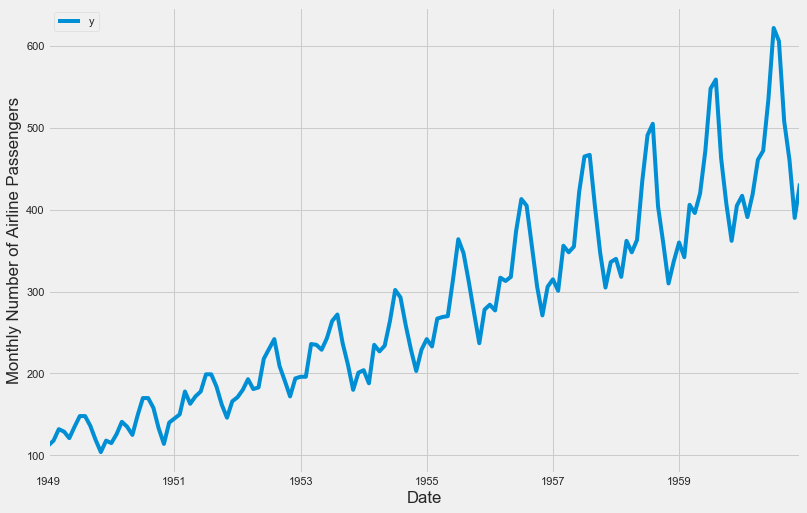

In [11]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

### Time Series Forecasting with Prophet

* Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

* we are looking to predict future values of our time series 3 years into the future.


In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [13]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:401: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


> In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function

In [14]:
# Prophet to generate 36 datestamps in the future
future_dates = my_model.make_future_dataframe(periods=36, freq='MS') 
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [15]:
future_dates.shape

(180, 1)

In [16]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:401: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:401: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.787427,605.762667,694.393138
176,1963-09-01,602.260711,556.993945,642.395103
177,1963-10-01,566.233600,523.678368,607.588855
178,1963-11-01,534.258296,490.935201,579.485173
179,1963-12-01,563.846779,519.207371,609.144506


> Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:
***

* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts

> A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

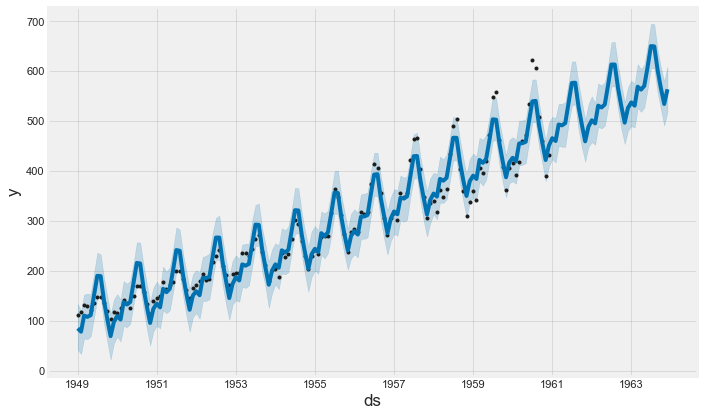

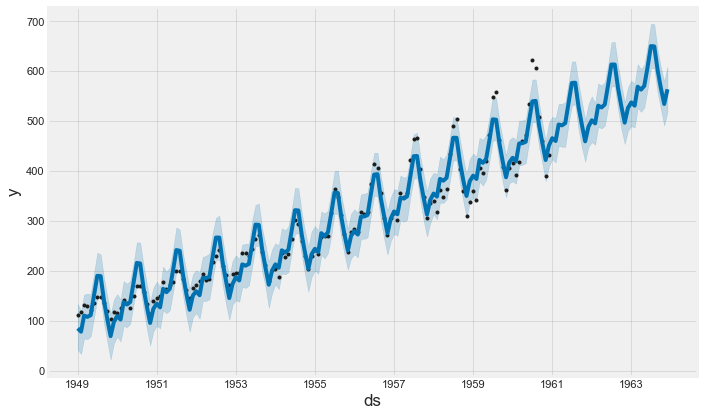

In [17]:
my_model.plot(forecast, uncertainty=True)

In [18]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          180 non-null    datetime64[ns]
 1   trend                       180 non-null    float64       
 2   yhat_lower                  180 non-null    float64       
 3   yhat_upper                  180 non-null    float64       
 4   trend_lower                 180 non-null    float64       
 5   trend_upper                 180 non-null    float64       
 6   additive_terms              180 non-null    float64       
 7   additive_terms_lower        180 non-null    float64       
 8   additive_terms_upper        180 non-null    float64       
 9   yearly                      180 non-null    float64       
 10  yearly_lower                180 non-null    float64       
 11  yearly_upper                180 non-null    float64       

* Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

* One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values:

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:401: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


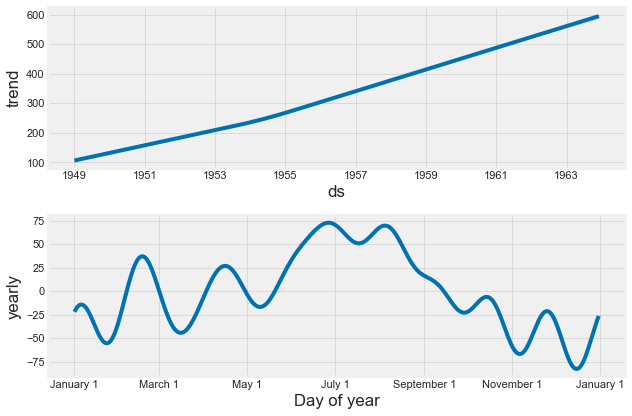

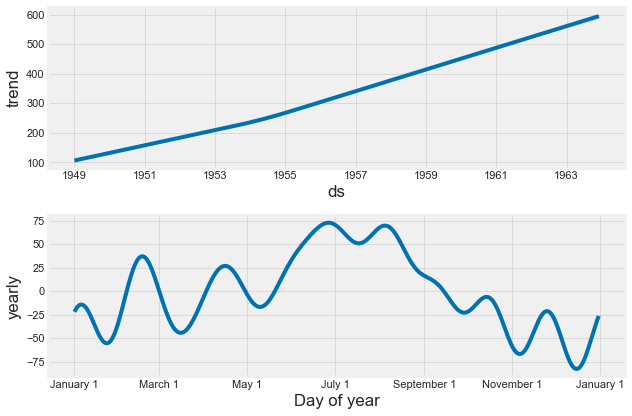

In [19]:
my_model.plot_components(forecast);

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(my_model, forecast)